# Neural Network Model

### General Steps 

1. Import Data
2. Clean Data
3. Split data into testing/training splits
4. Create a model 
5. Train the model 
6. Make predictions
7. Evaluate and improve 

## Importing Data

In [1]:
# requirments 
import math
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM 
import matplotlib.pyplot as plt 
plt.style.use("fivethirtyeight")



In [2]:
df = pd.read_csv("@MES00_Micro-e-mini-S&P_Day_20years.txt")
print(df)


            Date   Time     Open     High      Low    Close      Vol      OI
0     08/20/2001  16:00  1063.50  1075.75  1059.75  1074.50   133864  133320
1     08/21/2001  16:00  1075.00  1082.25  1054.50  1055.00   143288  136675
2     08/22/2001  16:00  1055.00  1070.75  1054.00  1066.00   199995  138209
3     08/23/2001  16:00  1067.75  1071.50  1061.00  1062.25   150673  135146
4     08/24/2001  16:00  1063.50  1087.75  1063.50  1086.25   159590  130276
...          ...    ...      ...      ...      ...      ...      ...     ...
5041  08/16/2021  16:00  4456.25  4476.50  4432.50  4474.00   658401   99811
5042  08/17/2021  16:00  4471.00  4472.25  4412.00  4443.50  1042708  100967
5043  08/18/2021  16:00  4437.00  4449.75  4381.75  4394.50   936206  118406
5044  08/19/2021  16:00  4389.25  4414.75  4347.50  4401.50  1248532  118406
5045  08/20/2021  16:00  4403.50  4405.00  4392.50  4403.00    16563  118406

[5046 rows x 8 columns]


In [3]:
df.shape


(5046, 8)

In [4]:
df.describe()

,Open,High,Low,Close,Vol,OI
count,5046.000000,5046.000000,5046.000000,5046.000000,5.046000e+03,5.046000e+03
mean,1634.428855,1646.739100,1621.488357,1635.216340,1.374134e+06,1.799253e+06
std,854.709551,859.027083,850.314485,855.546227,8.230495e+05,1.122857e+06
min,444.500000,464.500000,435.500000,445.750000,0.000000e+00,0.000000e+00
25%,1022.500000,1030.500000,1014.062500,1022.500000,7.343558e+05,5.744645e+05
50%,1238.250000,1246.625000,1228.750000,1239.000000,1.267820e+06,2.342907e+06
75%,2099.375000,2111.562500,2088.437500,2100.000000,1.850856e+06,2.792851e+06
max,4471.000000,4476.500000,4451.000000,4474.000000,6.285917e+06,3.594453e+06


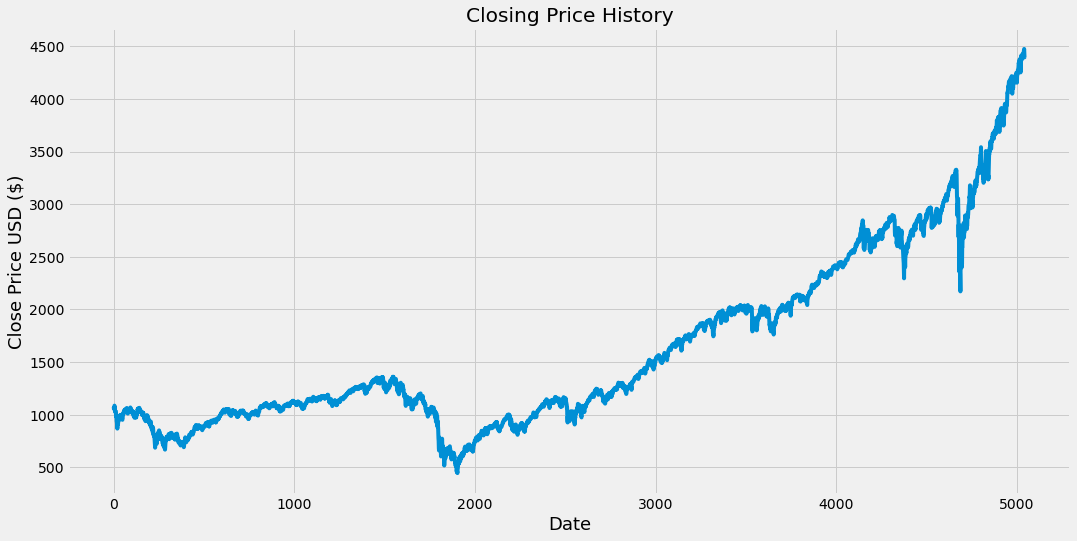

In [5]:
# Visualize the closing price history 
plt.figure(figsize=(16,8))
plt.title("Closing Price History")
plt.plot(df["Close"])
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price USD ($)", fontsize=18)
plt.show()

In [6]:
# scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_df = scaler.fit_transform(df["Close"].values.reshape(-1,1))
scaled_df



array([[0.15608515],
       [0.15124434],
       [0.15397505],
       ...,
       [0.98026438],
       [0.98200211],
       [0.98237448]])

In [7]:
# get the number of rows to train the model on 
training_data_len = math.ceil(len(scaled_df) * .8)
training_data_len 

4037

In [8]:
# create scaled training dataset
train_df = scaled_df[0:training_data_len, :]
train_df

array([[0.15608515],
       [0.15124434],
       [0.15397505],
       ...,
       [0.49413517],
       [0.4950661 ],
       [0.48563272]])

In [9]:
# create training data set
# create the scaled training dataset
train_data = scaled_df[0:training_data_len, :]
# split data into x_train and y_train datasets
x_train = []
y_train = []

for i in range(60, len(train_data)): 
    x_train.append(train_data[i-60: i, 0])
    y_train.append(train_data[i,0])
    #print(x_train)
    #print(y_train)
    print()

In [10]:
# convert x_train and y_train to numpy arrays
x_train= np.array(x_train)
y_train = np.array(y_train)

In [11]:
# reshape the data so tensorflow will accept it (has to be 3 demensional)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print(x_train.shape)

(3977, 60, 1)


In [12]:
# build the LSTM Model  
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [13]:
# compile the model 
model.compile(optimizer='adam', loss='mean_squared_error')

In [14]:
# train the model 
model.fit(x_train, y_train, batch_size=1, epochs=5)

Epoch 1/5
3977/3977 [==============================] - 41s 10ms/step - loss: 1.6373e-04
Epoch 2/5
3977/3977 [==============================] - 40s 10ms/step - loss: 7.6535e-05
Epoch 3/5
3977/3977 [==============================] - 40s 10ms/step - loss: 6.6436e-05
Epoch 4/5
3977/3977 [==============================] - 40s 10ms/step - loss: 5.2541e-05
Epoch 5/5
3977/3977 [==============================] - 41s 10ms/step - loss: 4.7419e-05


In [15]:
# create the testing data set
# create a new array containing scaled values from index 1543 to 2003
test_data = scaled_df[training_data_len - 60:, :]
x_test = []
y_test = test_data[training_data_len: ]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [16]:
# convert data to numpy array 
x_test = np.array(x_test)

In [17]:
# reshape the data 
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [18]:
# get models predicted price values
predictions = model.predict(x_test)
inversedPredictions = scaler.inverse_transform(predictions)
inversedPredictions


array([[2346.2346],
       [2344.9802],
       [2343.6443],
       ...,
       [4105.0713],
       [4063.2036],
       [4073.3518]], dtype=float32)

No handles with labels found to put in legend.


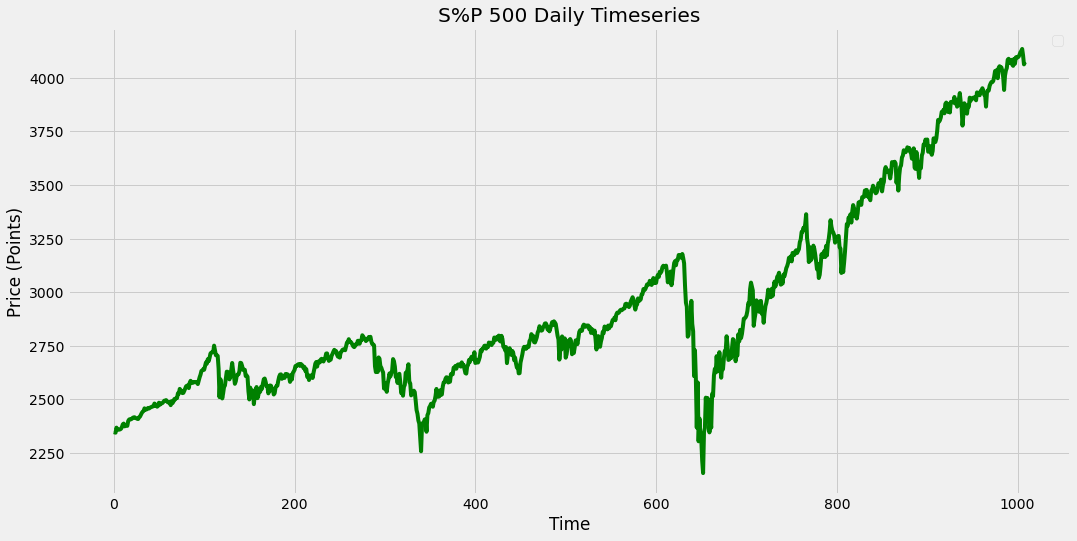

In [19]:
# plot test predictions
plt.figure(figsize=(16,8))
plt.plot(y_test, color='black')
plt.plot(inversedPredictions, color = 'green')
plt.title('S%P 500 Daily Timeseries')
plt.xlabel('Time')
plt.ylabel('Price (Points)')
plt.legend()
plt.show()



# First Run 

### Clean the Data

In [23]:
drop1 = df.drop(columns=['Open'])
drop2 = drop1.drop(columns=['High'])
drop3 = drop2.drop(columns=['Low'])
drop4 = drop3.drop(columns=['Up'])
clean_data = drop4.drop(columns=['Down'])
print(clean_data)

               Date   Time    Close
0        09/11/1997  03:35  1030.75
1        09/11/1997  04:50  1030.25
2        09/11/1997  07:10  1029.50
3        09/11/1997  07:15  1029.00
4        09/11/1997  07:25  1028.50
...             ...    ...      ...
1534492  08/16/2021  19:50  4466.75
1534493  08/16/2021  19:55  4466.25
1534494  08/16/2021  20:00  4466.50
1534495  08/16/2021  20:05  4466.25
1534496  08/16/2021  20:10  4466.25

[1534497 rows x 3 columns]


In [63]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(clean_data['Close'].values.reshape(-1, 1))




### Split Data

In [65]:
# Getting Counts

roundedFullCount = round(len(scaled_data))
x_test_count = round(len(scaled_data)*0.80)
print(x_test_count)
print(clean_data['Date'][1227598])
split_point = scaled_data[x_test_count]



1227598
03/29/2017


In [66]:
x_train = []
i = 0
stop = False
while(i > x_test_count):
    if(i > x_test_count):
        x_train.append(scaled_data[i].value)
        i = i + 1
    else:
        break;
    
print(x_train)


[]


In [ ]:
for i in roundedFullCount:
    if scaled_data[i] < x_test_count:
        x_train.append(scaled_data[i])